# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Photos for Question 1 are uploaded on github.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
csv_path = "airbnb_hw.csv"
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160 )

In [6]:
#Load and Clean
df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]

In [7]:
## Coerce numeric columns
num_cols = ["Beds", "Number Of Reviews", "Number of Records", "Review Scores Rating", "Price"]
for c in num_cols:
    if c in df.columns and df[c].dtype == object:
        df[c] = (
            df[c].astype(str)
                  .str.replace(r"[$,]", "", regex=True)
                  .str.strip()
        )
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")


In [8]:
# Integer-like view of beds for grouping (preserves missing using Int64)
if "Beds" in df.columns:
    df["Beds_int"] = df["Beds"].round().astype("Int64")

In [9]:
#2: Dimensions, Variables, head()
print("\n==================== Q1. LOAD & EXAMINE ====================")
print(f"Dimensions (observations x variables): {df.shape[0]} x {df.shape[1]}")
print("\nColumns:")
print(list(df.columns))
print("\n.head(10):")
print(df.head(10))


==================== Q1. LOAD & EXAMINE ====================
Dimensions (observations x variables): 30478 x 14

Columns:
['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating', 'Beds_int']

.head(10):
    Host Id Host Since                                 Name Neighbourhood Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0   5162530        NaN      1 Bedroom in Prime Williamsburg      Brooklyn     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1  33134899        NaN      Sunny, Private room in Bushwick      Brooklyn     Apartment                         NaN     Private room  11206.0   1.0   
2  39608626        NaN                 Sunny Room in Harlem     Manhattan     Apartment                         NaN     Private room  10032.0   1.0   
3       500  6/26/2008   Gorgeous 1 BR with P

Question 2 Answers:
- Dimensions: 30,478 rows (observations) × 13 columns (variables).
- Variables included:
Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price, Review Scores Rating. tHE first rows show typical listining in Brooklyn and Manhattan, mostly apartmetns offered as entire homes or private rooms.

In [10]:
#3 Crosstab Room Type x Property Type
print("\n==================== Q2. CROSSTAB ====================")
ct_counts = pd.crosstab(df["Room Type"], df["Property Type"])
ct_rowprop = pd.crosstab(df["Room Type"], df["Property Type"], normalize="index")

print("\nCrosstab (counts): Room Type x Property Type")
print(ct_counts)

print("\nCrosstab (row proportions): Room Type x Property Type")
print(ct_rowprop.round(3))


==================== Q2. CROSSTAB ====================

Crosstab (counts): Room Type x Property Type
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  Loft  Other  Tent  \
Room Type                                                                                                                                                     
Entire home/apt      15669               13     7         4      1          6       0       0           72     4    752    0           1   392     14     0   
Private room         10748              155     1         0      1          1       1       1           22    16   1258    2           0   312     29     4   
Shared room            685               12     0         0      0          0       0       0            0    11     80    0           0    49      4     0   

Property Type    Townhouse  Treehouse  Villa  
Room Type                                     
Entire h

In [11]:
# Identify property types where Private room share > Entire home/apt share
print("\nWhere are Private rooms more common than Entire home/apt (by Property Type)?")
# Build proportion by property centered view: for each property type, compare shares across room types
prop_counts = pd.crosstab(df["Property Type"], df["Room Type"])
prop_shares = prop_counts.div(prop_counts.sum(axis=1), axis=0)

if {"Private room", "Entire home/apt"}.issubset(prop_shares.columns):
    mask = prop_shares["Private room"] > prop_shares["Entire home/apt"]
    more_private_props = prop_shares.loc[mask].copy()
    # add counts for context
    more_private_props["n"] = prop_counts.sum(axis=1)
    print(more_private_props[["Private room", "Entire home/apt", "n"]].sort_values("Private room", ascending=False).round(3))
else:
    print("Not enough room-type categories present to compare (need both 'Private room' and 'Entire home/apt').")



Where are Private rooms more common than Entire home/apt (by Property Type)?
Room Type        Private room  Entire home/apt     n
Property Type                                       
Castle                  1.000            0.000     1
Tent                    1.000            0.000     4
Chalet                  1.000            0.000     1
Hut                     1.000            0.000     2
Bed & Breakfast         0.861            0.072   180
Other                   0.617            0.298    47
House                   0.602            0.360  2090
Dorm                    0.516            0.129    31
Treehouse               0.250            0.000     4


Question 3 Answers: Apartments dominate all room types, especially entire homes. Private rooms appear often in both apartments and houses. Looking property by property, private rooms are more common than entire places in Houses, Bed & Breakfasts, Dorms, and “Other” properties, which matches the idea that these are more “shared” property types.

In [12]:
#4 Price Distribution +Log Transformation

In [13]:
price = df["Price"].dropna()


In [14]:
print("\nQ3) Price (raw) — basic stats:")
print(price.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).to_frame().T)


Q3) Price (raw) — basic stats:
         count        mean         std   min    1%    5%   25%    50%    75%    95%    99%      max
Price  30478.0  163.589737  197.785454  10.0  39.0  50.0  80.0  125.0  195.0  365.0  750.0  10000.0


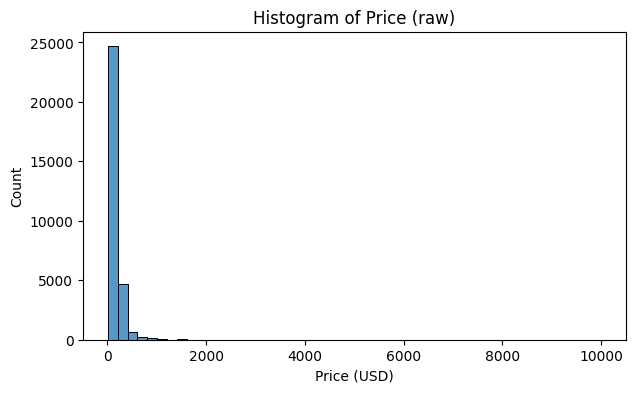

In [15]:
# This is the historgram raw
plt.figure(figsize=(7,4))
sns.histplot(price, bins=50)
plt.title("Histogram of Price (raw)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()


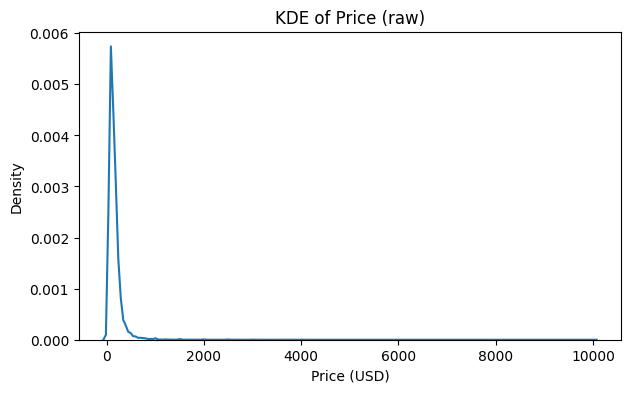

In [16]:
#This is the Kernel density (raw)
plt.figure(figsize=(7,4))
sns.kdeplot(price)
plt.title("KDE of Price (raw)")
plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.show()

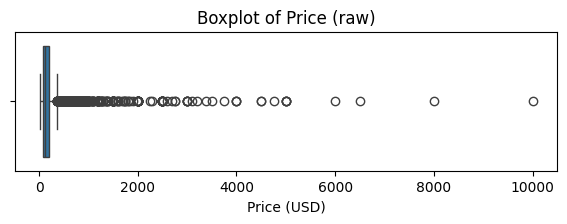

In [17]:
#This is the boxplot (raw)
plt.figure(figsize=(7,1.8))
sns.boxplot(x=price)
plt.title("Boxplot of Price (raw)")
plt.xlabel("Price (USD)")
plt.show()

In [18]:
print("\nQ3) Interpretation (raw): right-skewed with a long high-price tail → lots of outliers. Raw scale is not great.")



Q3) Interpretation (raw): right-skewed with a long high-price tail → lots of outliers. Raw scale is not great.


In [21]:
# make the log version (only for positive prices; 0 or negative -> NaN)
df["price_log"] = np.where(df["Price"] > 0, np.log(df["Price"]), np.nan)
price_log = df["price_log"].dropna()

print("\nQ3) log(Price) — basic stats:")
print(price_log.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).to_frame().T)


Q3) log(Price) — basic stats:
             count      mean       std       min        1%        5%       25%       50%    75%       95%       99%      max
price_log  30478.0  4.860495  0.627704  2.302585  3.663562  3.912023  4.382027  4.828314  5.273  5.899897  6.620073  9.21034


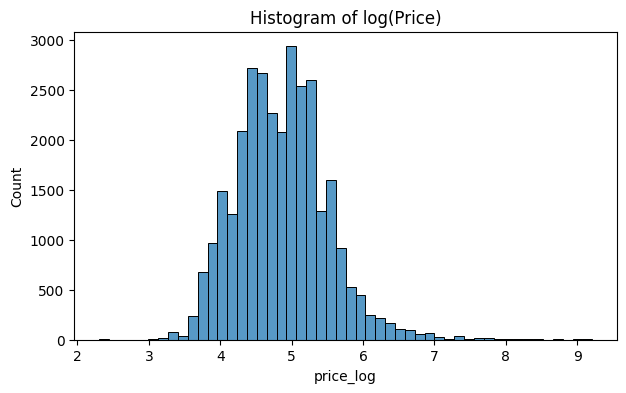

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(df["price_log"].dropna(), bins=50)
plt.title("Histogram of log(Price)")
plt.show()

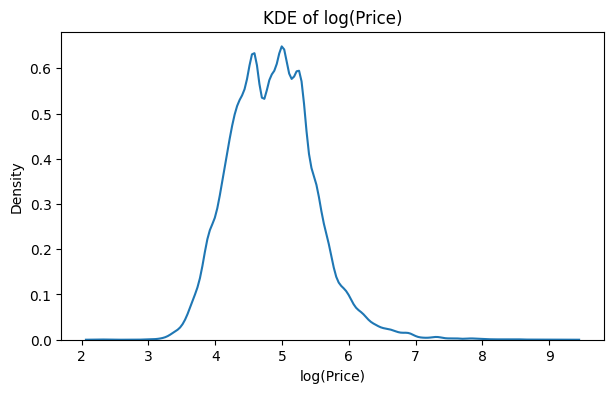

In [23]:
plt.figure(figsize=(7,4))
sns.kdeplot(df["price_log"].dropna())
plt.title("KDE of log(Price)")
plt.xlabel("log(Price)")
plt.ylabel("Density")
plt.show()

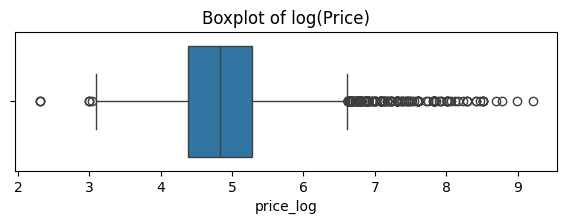


Q3) Interpretation (log): way more symmetric and tame; outliers less dominant. Log scale is better for analysis/plots.


In [24]:
plt.figure(figsize=(7,1.8))
sns.boxplot(x=df["price_log"].dropna())
plt.title("Boxplot of log(Price)")
plt.show()

print("\nQ3) Interpretation (log): way more symmetric and tame; outliers less dominant. Log scale is better for analysis/plots.")


For the Price variable, most listings are between $75 and $200, but there’s a long right tail going up to $10,000. The box plot shows a lot of high outliers. The mean ($164) is higher than the median ($125), and the data are badly scaled with big variation.

After using the log transformation (price_log), the distribution looks much more normal. The box plot shows fewer outliers, and the mean and median are almost the same. This makes the data better scaled and easier to work with.

In [25]:
#5 Scatterplot: log(Price) vs Beds +Groupby (Beds)
print("\nQ4) Scatter: log(Price) vs Beds")
scatter_df = df.loc[df["price_log"].notna() & df["Beds"].notna(), ["Beds", "price_log"]]



Q4) Scatter: log(Price) vs Beds


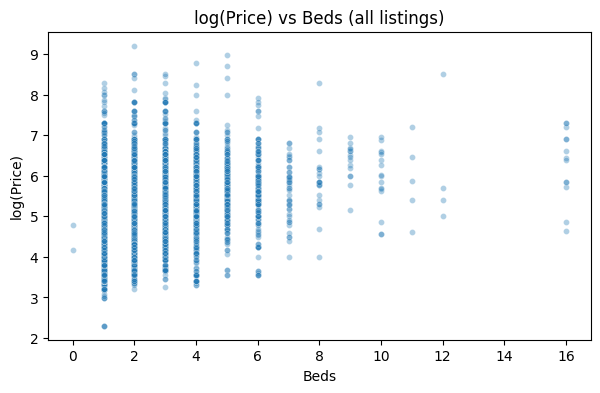

In [26]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=scatter_df, x="Beds", y="price_log", alpha=0.35, s=18)
plt.title("log(Price) vs Beds (all listings)")
plt.xlabel("Beds")
plt.ylabel("log(Price)")
plt.show()

In [27]:
# group by beds (rounded) and describe the price behavior
print("\nQ4) Price grouped by (rounded) Beds:")
by_beds = (
    df.loc[df["Beds_int"].notna()]
      .groupby("Beds_int")["Price"]
      .agg(count="count", mean="mean", median="median", std="std", min="min", max="max")
      .sort_index()
)
print(by_beds)

print("\nQ4) Takeaway: more beds → higher average price; std also increases (bigger places vary more).")




Q4) Price grouped by (rounded) Beds:
          count         mean  median          std  min    max
Beds_int                                                     
0             2    92.000000    92.0    38.183766   65    119
1         20344   127.673810   100.0   107.047827   10   4000
2          6610   199.061271   160.0   225.706318   25  10000
3          2071   268.118300   200.0   303.106942   26   5000
4           783   315.332056   247.0   353.184402   27   6500
5           284   411.500000   290.0   672.610659   35   8000
6           177   401.768362   275.0   417.018431   35   2750
7            45   341.377778   300.0   220.116631   55    900
8            24   589.041667   350.0   793.054934   55   4000
9            15   618.000000   650.0   233.649616  175   1050
10           16   480.187500   407.5   296.820534   95   1050
11            5   535.800000   359.0   499.217588  100   1350
12            4  1418.750000   262.5  2388.285211  150   5000
16           13   736.000000   6

When I made the scatterplot of price_log vs. Beds, I saw a clear upward trend: as the number of beds goes up, the log of price also increases. At the same time, the spread of points gets wider for higher bed counts, meaning bigger properties have much more variation in price.

Using .groupby(), the results show that the average price rises with more beds: about $128 for 1 bed, $199 for 2 beds, $268 for 3 beds, and over $400 for 5 beds. The standard deviation also grows a lot with more beds, showing that prices for larger properties are less consistent.

So, the pattern is higher beds → higher average prices, but also more variability in those prices.


Q5) Scatter colored by Room Type


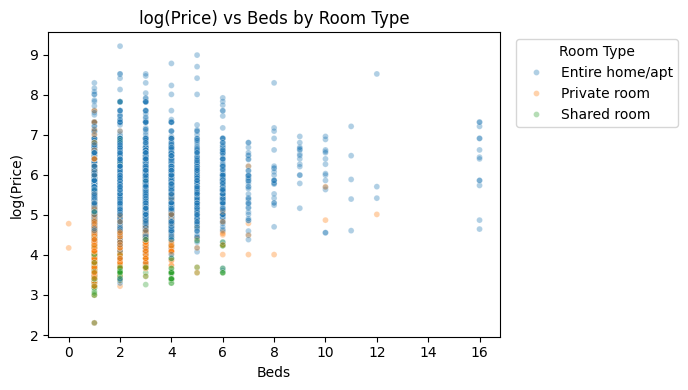

In [28]:
#6  Scatters colored by categroy + price by (Room Type, Property Type)
print("\nQ5) Scatter colored by Room Type")
if "Room Type" in df.columns:
    plt.figure(figsize=(7,4))
    sns.scatterplot(
        data=df.loc[df["price_log"].notna() & df["Beds"].notna()],
        x="Beds", y="price_log", hue="Room Type", alpha=0.35, s=18
    )
    plt.title("log(Price) vs Beds by Room Type")
    plt.xlabel("Beds")
    plt.ylabel("log(Price)")
    plt.legend(title="Room Type", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()



Q5) Scatter colored by top Property Types (to keep legend readable)


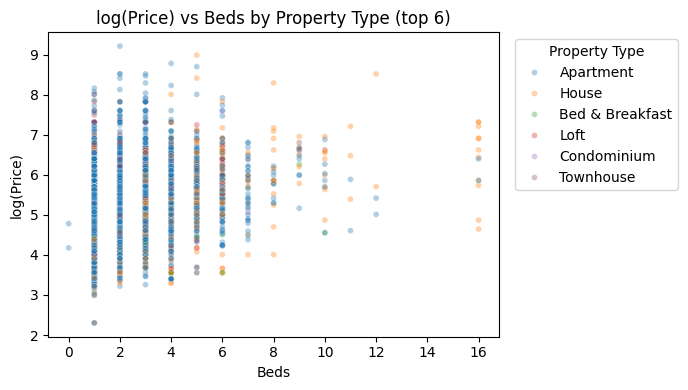

In [29]:
print("\nQ5) Scatter colored by top Property Types (to keep legend readable)")
if "Property Type" in df.columns:
    top_props = df["Property Type"].value_counts().head(6).index
    sub = df.loc[
        df["price_log"].notna() & df["Beds"].notna() & df["Property Type"].isin(top_props)
    ]
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=sub, x="Beds", y="price_log", hue="Property Type", alpha=0.35, s=18)
    plt.title("log(Price) vs Beds by Property Type (top 6)")
    plt.xlabel("Beds")
    plt.ylabel("log(Price)")
    plt.legend(title="Property Type", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [30]:
# full price summary by the two categories
print("\nQ5) Price by (Room Type, Property Type) — summary stats:")
grp = (
    df.groupby(["Room Type", "Property Type"])["Price"]
      .agg(count="count", mean="mean", median="median", std="std", min="min", max="max")
      .sort_values(by="mean", ascending=False)
)
print(grp)



Q5) Price by (Room Type, Property Type) — summary stats:
                                 count        mean  median          std  min    max
Room Type       Property Type                                                      
Entire home/apt Other               14  843.428571   300.0  1133.062271   66   4000
                Villa                4  529.750000   249.5   650.963581  120   1500
                Loft               392  330.510204   225.0   321.519721   55   3000
                Condominium         72  304.861111   200.0   266.197497   80   1990
                House              752  297.263298   195.0   468.409428   27   8000
                Townhouse           83  280.783133   190.0   314.605252   66   2500
                Cabin                1  250.000000   250.0          NaN  250    250
                Apartment        15669  213.224839   175.0   218.097834   10  10000
Private room    Other               29  211.931034   119.0   235.404505   39   1200
Entire home/apt Be

In [31]:
# report the combos that are highest on mean and on std (i.e., most expensive and most variable)
if not grp.empty:
    highest_mean_combo = grp["mean"].idxmax()
    highest_mean_val = grp["mean"].max()
    highest_std_combo = grp["std"].idxmax()
    highest_std_val = grp["std"].max()
    print(f"\nQ5) Highest average price: {highest_mean_combo} → ${highest_mean_val:,.2f}")
    print(f"Q5) Highest price variability (std): {highest_std_combo} → ${highest_std_val:,.2f}")

print("\nQ5) Mean vs Median note: data are right-skewed with big outliers → MEDIAN is a more reliable 'typical' price than MEAN.")



Q5) Highest average price: ('Entire home/apt', 'Other') → $843.43
Q5) Highest price variability (std): ('Entire home/apt', 'Other') → $1,133.06

Q5) Mean vs Median note: data are right-skewed with big outliers → MEDIAN is a more reliable 'typical' price than MEAN.


When I made the scatterplot of price_log vs. Beds and colored it by Room Type and Property Type, I noticed clear differences. Entire homes/apartments almost always had the highest prices, while private and shared rooms were much lower. For property type, condos, lofts, and villas stood out with higher prices compared to apartments and houses.

Looking at the group statistics, Entire home/apt had the highest average prices and also the biggest standard deviation, meaning lots of variation. For property types, villas and condos had the highest average prices, while houses and “other” had the biggest spread.

Because the data are very skewed and influenced by outliers, the median is a more reliable measure of a “typical” price than the mean.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [32]:
df=pd.read_csv('drilling_rigs.csv')
df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [33]:
shape = df.shape
columns = df.columns.tolist()
dtypes = df.dtypes

1.)
How many observations? Observations: 623 rows
How many variables? 10
Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Several numeric columns were incorrectly read as object. After coercion they are numeric.
Explain clearly how these data need to be cleaned:
  1.1 Coerce numeric columns for every column except Month, run
df[col] = pd.to_numeric(df[col], errors='coerce').
  1.2 Create a time variable using a robust parse instead
  1.3 Sort by time: df = df.sort_values('time').


In [34]:
for col in df.columns:
    if col != 'Month':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [35]:
df['time'] = pd.to_datetime(df['Month'], errors='coerce')


/tmp/ipython-input-2098366315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['Month'], errors='coerce')


In [36]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Dtypes:\n", df.dtypes)

Shape: (623, 11)
Columns: ['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)', 'time']
Dtypes:
 Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotar

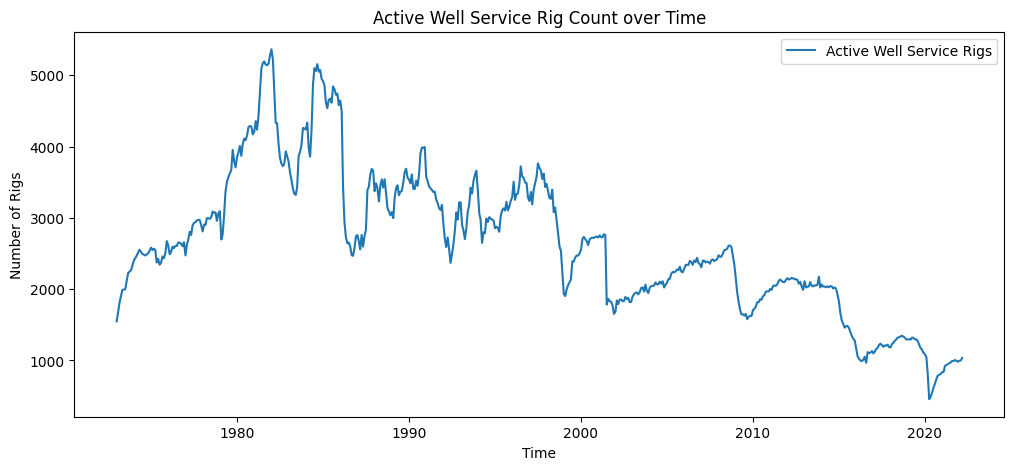

In [37]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], label='Active Well Service Rigs')
plt.title('Active Well Service Rig Count over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend()
plt.show()

In [38]:
df['active_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()


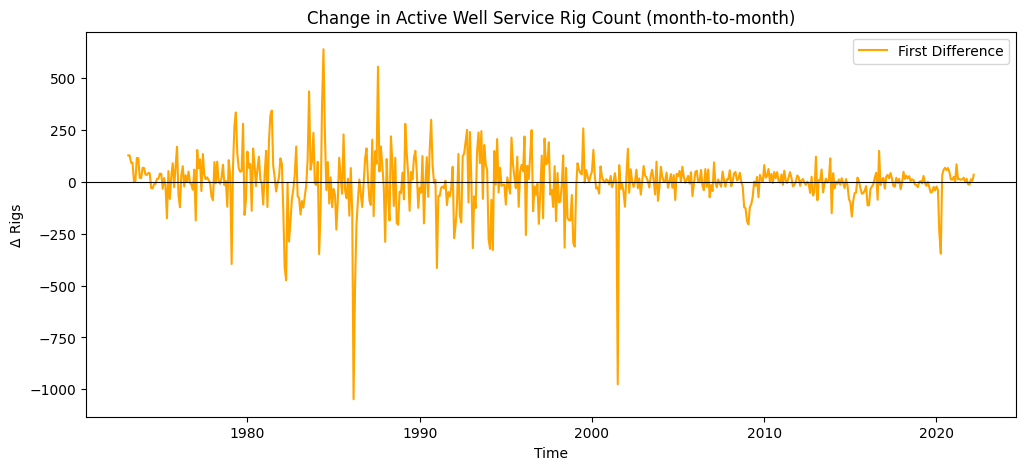

In [39]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['active_diff'], label='First Difference', color='orange')
plt.title('Change in Active Well Service Rig Count (month-to-month)')
plt.xlabel('Time')
plt.ylabel('Δ Rigs')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()

In [40]:
df_melt = df.melt(
    id_vars=['time'],
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig Type', value_name='Count'
)

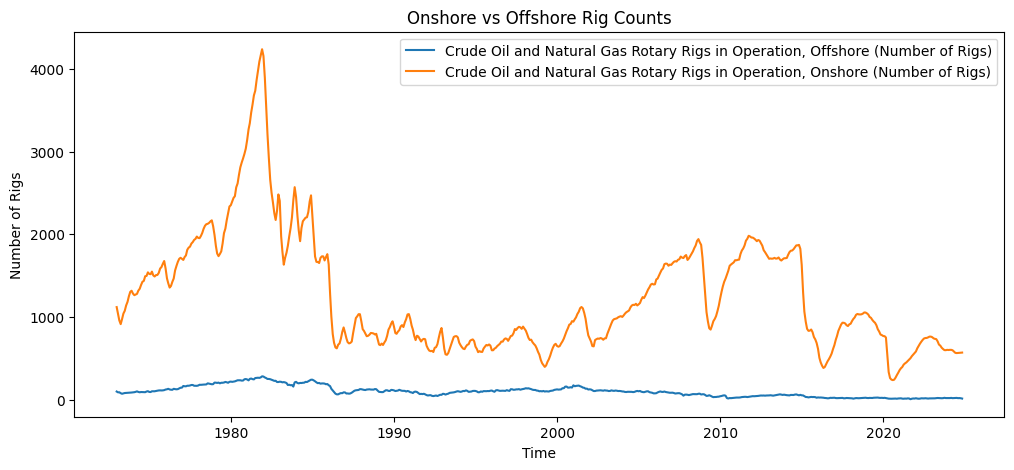

In [41]:
plt.figure(figsize=(12,5))
for label, g in df_melt.groupby('Rig Type'):
    plt.plot(g['time'], g['Count'], label=label)
plt.title('Onshore vs Offshore Rig Counts')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend()
plt.show()